In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

# Generating time series

In [2]:
# sin series
y_sin = np.sin(np.arange(0,1000,.01))

# gaussian series
y_gauss = np.random.normal(size=100000)

# gaussian series
y_st = skew_tent_map()
y_lm = logistic_map()
y_sm = schuster_map()
y_hm = henon_map()


time_steps = np.arange(0, 1000, 0.1)
params = {'σ' : 10., 'ρ' : 28., 'β' : 8/3}
xyz0 = np.array([1., 1., 1.])
lorenz_solution = runge_kutta(time_steps, xyz0, lorentz_ode, params)
y_lo, _, _ = lorenz_solution.T

In [3]:
# let's cut of begging of each time series, to make sure that it is moving along attractor
# (no need to do it for regular or stochastic)

In [4]:
y_sin = y_sin[1000:]
y_gauss = y_gauss[1000:]

y_st = y_st[1000:]
y_lm = y_lm[1000:]
y_sm = y_sm[1000:]
y_hm = y_hm[1000:]
y_lo = y_lo[1000:]

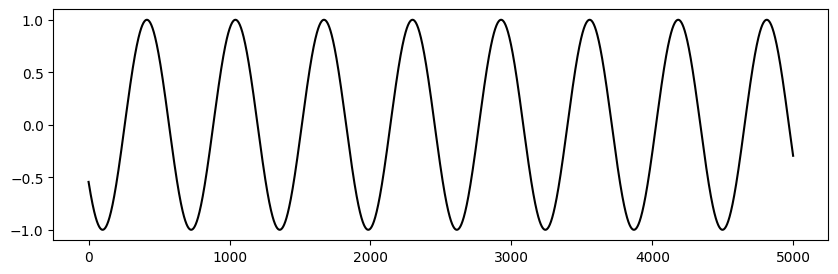

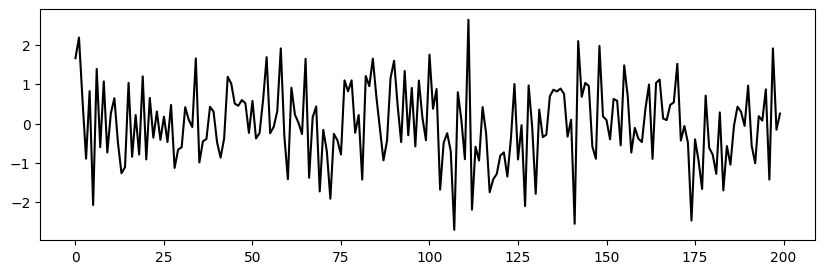

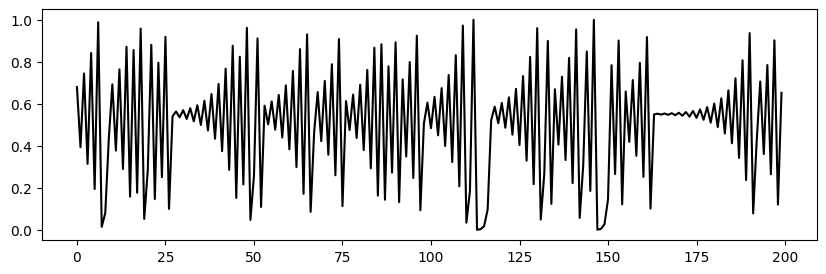

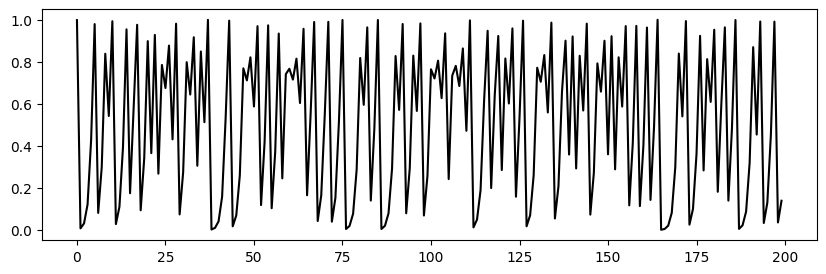

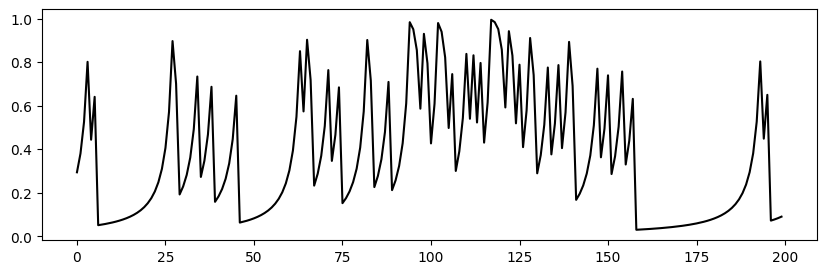

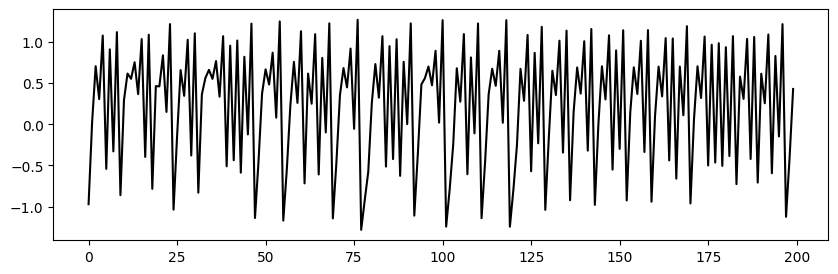

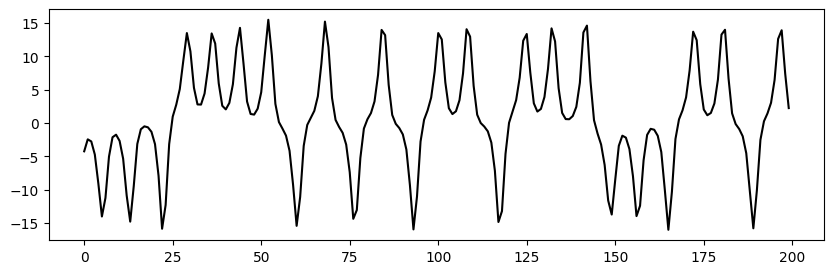

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(y_sin[:5000], c='black')
fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(y_gauss[:200], c='black')
fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(y_st[:200], c='black')
fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(y_lm[:200], c='black')
fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(y_sm[:200], c='black')
fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(y_hm[:200], c='black')
fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(y_lo[:200], c='black')

# Entropy Complexity Plane Algorithm

In [6]:
from itertools import permutations

In [8]:
def generate_z_vectors(y, size=5):
    zs = []
    for i in range(len(y)-size):
        zs.append(y[i:i+size])
    return np.array(zs)

def S(p):
    return -np.sum(p * np.log2(p + 10**(-13)))
    
def complexity_entropy(y, size=5):
    zs = generate_z_vectors(y,size)
    
    
    all_patterns = list(permutations(np.arange(size),r=size))
    freqs = np.zeros(len(all_patterns))
    n = len(all_patterns)
    
    patterns, counts = np.unique(np.argsort(zs, axis=1),return_counts=True, axis=0)
    
    for pattern, count in zip(patterns, counts):
        freqs[np.all(all_patterns == pattern, axis=1)] = count
    
    
    P = freqs / np.sum(freqs)
    Pe = np.full(n, 1/n)
    
    Smax = np.log2(len(P)) # S(Pe)
    
    H = S(P)/Smax
    
    Jmax = -2*(((n+1)/n)*np.log2(n+1) + np.log2(n) - 2*np.log2(2*n))**(-1)
    J = S((P + Pe)/2) - S(P)/2 - S(Pe)/2
    
    C = J * H * Jmax
    
    return H, C
    

In [9]:
H_sin, C_sin = complexity_entropy(y_sin, 6)
H_gauss, C_gauss = complexity_entropy(y_gauss, 6)

H_st, C_st = complexity_entropy(y_st, 6)
H_lm, C_lm = complexity_entropy(y_lm, 6)
H_sm, C_sm = complexity_entropy(y_sm, 6)
H_hm, C_hm = complexity_entropy(y_hm, 6)
H_lo, C_lo = complexity_entropy(y_lo, 6)

In [10]:
H_lo, C_lo

(0.5171265591694737, 0.4386837426470757)

In [11]:
from ordpy import complexity_entropy, minimum_complexity_entropy, maximum_complexity_entropy
min_ce = minimum_complexity_entropy(dx=6, size=100)
max_ce = maximum_complexity_entropy(dx=6, m=100)

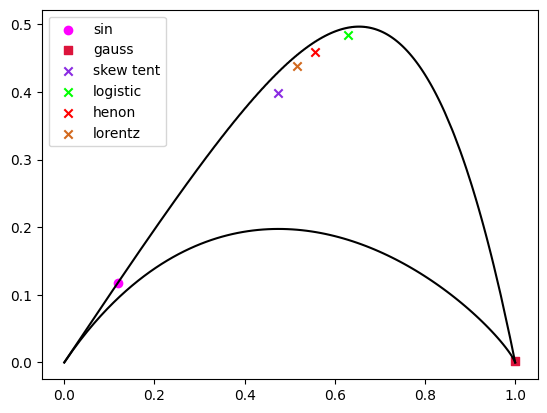

In [12]:
plt.scatter(H_sin, C_sin, c='fuchsia', marker='o', label='sin')
plt.scatter(H_gauss, C_gauss, c='crimson', marker='s', label='gauss')

plt.scatter(H_st, C_st, c='blueviolet', marker='x', label='skew tent')
plt.scatter(H_lm, C_lm, c='lime', marker='x', label='logistic')
plt.scatter(H_hm, C_hm, c='red', marker='x', label='henon')
plt.scatter(H_lo, C_lo, c='chocolate', marker='x', label='lorentz')



plt.plot(min_ce[:,0], min_ce[:, 1], c='black')
plt.plot(max_ce[:,0], max_ce[:, 1], c='black')


plt.legend()
plt.show()

In [15]:

import pandas as pd
df = pd.read_csv('BTC2021.csv')

In [17]:
df.sort_values('unix', inplace=True)

In [20]:
y = df.close.values

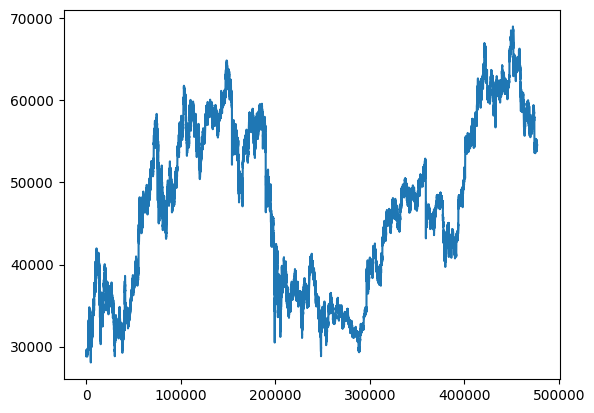

In [21]:
plt.plot(y)

In [23]:
e, c = complexity_entropy(y, 6)

C:\Users\Korney\AppData\Local\Temp\ipykernel_22376\37945711.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


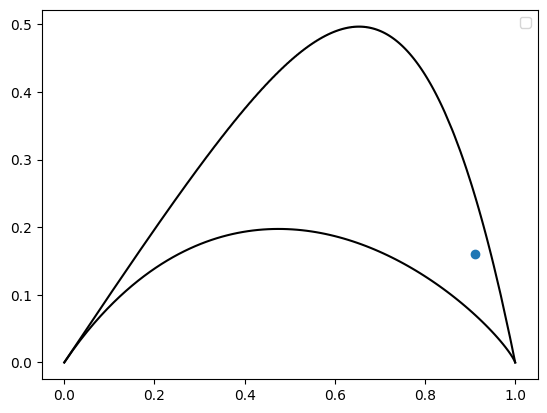

In [24]:
plt.scatter(e,c)
plt.plot(min_ce[:,0], min_ce[:, 1], c='black')
plt.plot(max_ce[:,0], max_ce[:, 1], c='black')


plt.legend()
plt.show()